## Understanding Product Categories
#### Frequency Tables :
- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_product = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [14]:
df_product.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [4]:
#Frequency Table for Product Category
df_product_category = df_product["category"].value_counts()
display(df_product_category)

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [5]:
#Top five most listed product categories.
top_categories_df  = df_product["category"].value_counts().head(5)
display(top_categories_df)

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

#### Visualizations :
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [6]:
frequency_table = df_product["category"].value_counts().head(5)

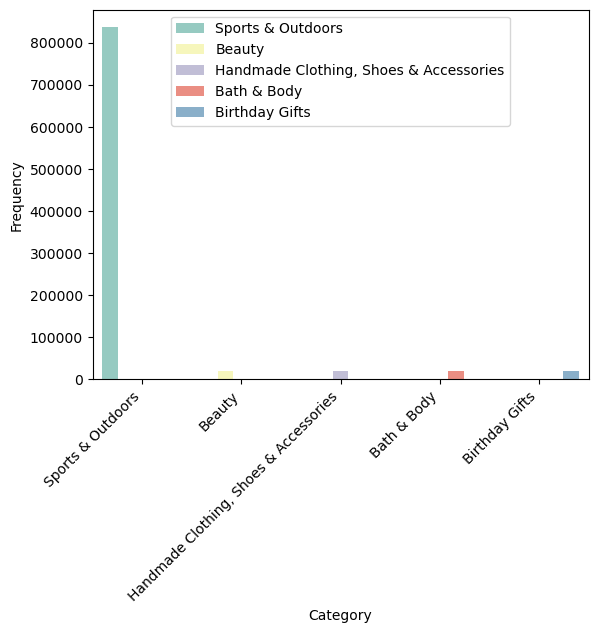

In [7]:
fig, axes = plt.subplots()
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3", hue=frequency_table.index, 
            order=['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories', 'Bath & Body', 'Birthday Gifts'], ax=axes)
axes.set_ylabel('Frequency')
axes.set_xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()


### Part 2 :Delving into Product Pricing


In [8]:
df_product['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [9]:
#Calculate the mean,median and mode for the price of products.
mean_price = df_product['price'].mean()
median_price = df_product['price'].median()
mode_price = df_product['price'].mode()[0]
mean_price,median_price,mode_price

(89.24380943985244, 19.09, 9.99)

* What's the average price point of products listed?
-  89.24380943985244(mean)
* How does this compare with the most common price point (mode)?
- The most frequent (mode) s price is 9.99. This value appears more frequently than any other price in the dataset.
- Positive Skewness (Right Skewed Distribution).
- Outliers
- Non-Normal Distribution

In [10]:
#variance, standard deviation, range, and interquartile range for product price.
variance_price = df_product['price'].var()
std_dev_price = df_product['price'].std()
min_price = df_product['price'].min()
max_price = df_product['price'].max()
range_price = max_price - min_price
quantiles_price = df_product['price'].quantile([0.25, 0.5, 0.75])
variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

- How varied are the product prices? Are there any indicators of a significant spread in prices?
- This specific price of 119,445.49 is extremely high compared to the mean (89.24) and the mode (9.99). This suggests the presence of significant outliers in the dataset, which could greatly inflate the mean and indicate a large spread in prices.




### Visualizations

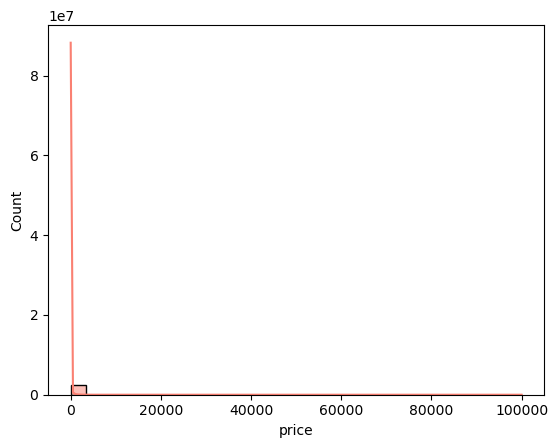

In [11]:
sns.histplot(df_product['price'], kde=True, bins=30, color="salmon");


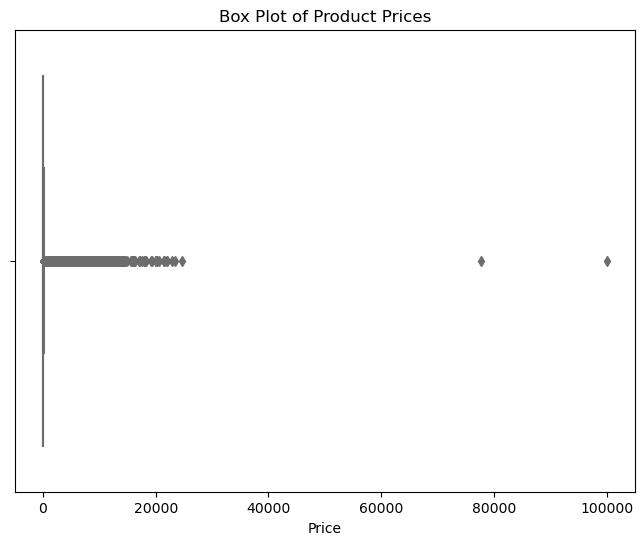

In [12]:
#Boxplot to show price significantly higher than the rest.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_product['price'], color="salmon")
plt.title("Box Plot of Product Prices")
plt.xlabel("Price")
plt.show()

### Unpacking Product Ratings

- Measures of Centrality:
- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [13]:
#Calculate the mean,median and mode for the ratings of products.
mean_price = df_product['reviews'].mean()
rounded_mean_reviews = round(mean_price,2)
median_price = df_product['reviews'].median()
mode_price = df_product['reviews'].mode()[0]
rounded_mean_reviews,median_price,mode_price

(480.63, 0.0, 0)

  
  #### Mean (480.63):
- The mean number of reviews per product is about 480.63. This suggests that, on average, products in the dataset receive a moderate to high number of reviews. However, this value might be skewed due to products with a large number of reviews.
 #### Median (0.0):
- The median number of reviews is 0, meaning that more than half of the products in the dataset have no reviews at all. 
 #### Mode (0):
- The mode being 0 reinforces the idea that the most frequent value in the dataset is zero reviews. In other words, the majority  of products have not been reviewed.
- A large portion of products in the dataset has no reviews, as suggested by the median and mode both being zero. This could mean that either these products are new, unpopular, or simply not receiving much attention from customers.
- Highly Reviewed Products Skew the Mean: The mean is much higher than the median and mode because a subset of products (likely the bestsellers or more popular items) has thousands of reviews, pulling the average upwards.

In [19]:
# Calculate variance, standard deviation, and interquartile range (IQR) for the 'stars' (ratings) column
rating_variance = df_product['reviews'].var()
rating_std_dev = df_product['reviews'].std()
rating_iqr = df_product['reviews'].quantile(0.75) - df_product['stars'].quantile(0.25)

# Print the results
print(f"Variance of reviews: {rating_variance}")
print(f"Standard deviation of reviews: {rating_std_dev}")
print(f"Interquartile range (IQR) of reviews: {rating_iqr}")

Variance of reviews: 35332611.92181505
Standard deviation of reviews: 5944.124150942261
Interquartile range (IQR) of reviews: 59.0


- These values are extremely high for a product rating scale (which is typically between 0 to 5 stars). Such high numbers suggest that the data contains some anomalies or outliers.


In [20]:
# Calculate skewness and kurtosis for the 'stars' (ratings) column
rating_skewness = df_product['reviews'].skew()
rating_kurtosis = df_product['reviews'].kurt()

# Print the results
print(f"Skewness of reviews: {rating_skewness}")
print(f"Kurtosis of reviews: {rating_kurtosis}")

Skewness of reviews: 102.81782179557166
Kurtosis of reviews: 17741.01460473757


- A very high positive skewness indicates that the distribution is heavily right-skewed. This means that most products have a small number of reviews, but there are a few products with a significantly larger number of reviews, which are pulling the tail of the distribution to the right.
- A kurtosis value this high indicates that the distribution has extremely heavy tails and is highly peaked. This suggests that there are many extreme values (outliers), where a small number of products have an extraordinarily large number of reviews compared to the majority of products.
- This type of distribution is far from normal, as a normal distribution would have a kurtosis around 3.

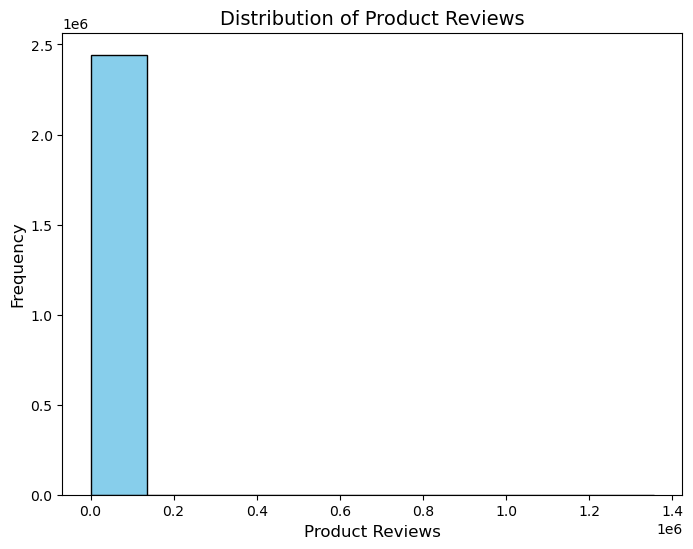

In [22]:
# Plot a histogram to visualize the distribution of product ratings (stars)
plt.figure(figsize=(8, 6))
plt.hist(df_product['reviews'], bins=10, edgecolor='black', color='skyblue')

# Adding labels and title
plt.title('Distribution of Product Reviews', fontsize=14)
plt.xlabel('Product Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the histogram
plt.show()

- Data Issue: Many of your product reviews might be recorded as zero. This could either be due to missing reviews or incorrect data entry.
- Range Issue: If the review column contains mostly zeros or missing values, the histogram will show a huge spike at 0, which isn’t typical for a product reviews dataset.